In [ ]:
import pandas as pd
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import chi2_contingency
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [52]:
# Load ecg data
df = pd.read_csv('data/combined_data.csv')

df

,Patient,age,sex_Female,sex_Male,ohca_True,ohca_Unknown,ttm_33.0,ttm_36.0,ttm_No TTM,shockable_rhythm_False,...,Segment_287_HRV_SDNN,Segment_287_LF_Power,Segment_287_HF_Power,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_Power,Segment_288_HF_Power,Segment_288_LF_HF_Ratio,outcome
0,284,-0.522787,False,True,True,False,True,False,False,False,...,0.981133,-0.093946,-0.088465,-0.096152,0.344520,1.128406,-0.063206,-0.062188,-0.238693,1
1,286,1.525272,True,False,False,False,False,False,True,True,...,1.816490,-0.073634,-0.100386,-0.059189,0.482280,0.000000,-0.061845,-0.061378,-0.176915,1
2,296,-0.842797,False,True,True,False,False,True,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,299,-1.034802,False,True,True,False,True,False,False,False,...,2.456931,-0.111831,-0.085917,-0.109046,-0.516477,0.501520,-0.063652,-0.062835,-0.192359,1
4,303,-0.650791,False,True,True,False,True,False,False,False,...,-0.759196,-0.182218,-0.129349,-0.121940,-1.170835,0.002860,-0.063798,-0.062743,-0.303560,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1016,1.653275,False,True,True,False,True,False,False,True,...,1.732954,-0.051216,-0.064506,-0.099590,-0.516477,1.641312,-0.062859,-0.062057,-0.201626,0
603,1017,-2.250837,False,True,True,False,False,False,True,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
604,1018,0.117231,False,True,True,False,False,True,False,False,...,-1.065494,0.000000,-0.130722,0.000000,1.308837,-0.880479,-0.063911,-0.063067,-0.189271,0
605,1019,0.693248,False,True,True,False,False,True,False,False,...,-0.870577,-0.182119,-0.130566,0.092101,-1.033075,-0.125366,-0.063918,-0.063072,-0.195448,1


In [57]:
# Loading the dataset that has the target value and original features and values
with open('data/patient_data.pkl', 'rb') as f:
    patient_data = pickle.load(f)

# Map 'Good' to 1 and 'Poor' to 0
patient_data['outcome'] = patient_data['outcome'].map({'Good': 1, 'Poor': 0}).astype(int)

patient_data

,Patient,hospital,age,sex,rosc,ohca,shockable_rhythm,ttm,outcome,cpc,rosc_missing,shockable_rhythm_missing
0,284,A,53.0,Male,NaN,True,True,33.0,1,1,1,0
1,286,F,85.0,Female,7.0,False,False,No TTM,1,1,0,0
2,296,A,48.0,Male,NaN,True,True,36.0,1,1,1,0
3,299,A,45.0,Male,NaN,True,True,33.0,1,1,1,0
4,303,D,51.0,Male,24.0,True,True,33.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
602,1016,E,87.0,Male,7.0,True,False,33.0,0,5,0,0
603,1017,F,26.0,Male,52.0,True,False,No TTM,0,5,0,0
604,1018,E,63.0,Male,NaN,True,True,36.0,0,5,1,0
605,1019,A,72.0,Male,NaN,True,True,36.0,1,1,1,0


In [59]:
df['age'] = patient_data['age']

df

,Patient,age,sex_Female,sex_Male,ohca_True,ohca_Unknown,ttm_33.0,ttm_36.0,ttm_No TTM,shockable_rhythm_False,...,Segment_287_HRV_SDNN,Segment_287_LF_Power,Segment_287_HF_Power,Segment_287_LF_HF_Ratio,Segment_288_Mean_HR,Segment_288_HRV_SDNN,Segment_288_LF_Power,Segment_288_HF_Power,Segment_288_LF_HF_Ratio,outcome
0,284,53.0,False,True,True,False,True,False,False,False,...,0.981133,-0.093946,-0.088465,-0.096152,0.344520,1.128406,-0.063206,-0.062188,-0.238693,1
1,286,85.0,True,False,False,False,False,False,True,True,...,1.816490,-0.073634,-0.100386,-0.059189,0.482280,0.000000,-0.061845,-0.061378,-0.176915,1
2,296,48.0,False,True,True,False,False,True,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,299,45.0,False,True,True,False,True,False,False,False,...,2.456931,-0.111831,-0.085917,-0.109046,-0.516477,0.501520,-0.063652,-0.062835,-0.192359,1
4,303,51.0,False,True,True,False,True,False,False,False,...,-0.759196,-0.182218,-0.129349,-0.121940,-1.170835,0.002860,-0.063798,-0.062743,-0.303560,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1016,87.0,False,True,True,False,True,False,False,True,...,1.732954,-0.051216,-0.064506,-0.099590,-0.516477,1.641312,-0.062859,-0.062057,-0.201626,0
603,1017,26.0,False,True,True,False,False,False,True,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
604,1018,63.0,False,True,True,False,False,True,False,False,...,-1.065494,0.000000,-0.130722,0.000000,1.308837,-0.880479,-0.063911,-0.063067,-0.189271,0
605,1019,72.0,False,True,True,False,False,True,False,False,...,-0.870577,-0.182119,-0.130566,0.092101,-1.033075,-0.125366,-0.063918,-0.063072,-0.195448,1


In [61]:
# Step 1: Recode the TTM variables into a single categorical variable if necessary
# For example, you might want to assign '33', '36', 'None' based on the TTM strategy
df['TTM_Category'] = df.apply(lambda x: '33' if x['ttm_33.0'] else ('36' if x['ttm_36.0'] else 'None'), axis=1)

# Step 2: Create a cross-tabulation table
crosstab = pd.crosstab(df['TTM_Category'], df['outcome'])

# Step 3: Perform the Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(crosstab)

# Print the results
print(f"Chi-square Test: chi2={chi2}, p-value={p}")


Chi-square Test: chi2=1.5247960095977278, p-value=0.4665463042403256


### Chi-square Test Results

- **Chi-square Statistic (chi2)**: 1.525
- **p-value**: 0.467

#### Interpretation

- **Statistical Significance**:
  - The p-value of 0.467 exceeds the common alpha level of 0.05, indicating that the differences observed in patient outcomes across different TTM strategies (`ttm_33.0`, `ttm_36.0`, `ttm_No TTM`) are not statistically significant.
  - There is a 46.7% chance that the observed differences could have occurred by random chance under the null hypothesis, which assumes no association between TTM strategies and patient outcomes.

#### Practical Implications

- **No Significant Difference**:
  - The analysis suggests that there is no significant impact of TTM strategy on patient outcomes within the scope of this dataset.
- **Further Investigation Needed**:
  - Consider examining additional variables or different patient demographics that might influence outcomes.
  - Assess whether the sample size was adequate to detect a significant effect, if any.

#### Conclusion

- The lack of statistical significance suggests that, based on this dataset, there is no evidence to support that different TTM strategies have varied effects on the outcomes studied. It is important to continue exploring other elements that might influence these findings.

In [67]:

def age_group(age):
    if age < 50:
        return '0-50'
    elif age <= 69:
        return '50-69'
    else:
        return '70+'

df['Age_Group'] = df['age'].apply(age_group)

print(df['Age_Group'].unique())  

['50-69' '70+' '0-50']


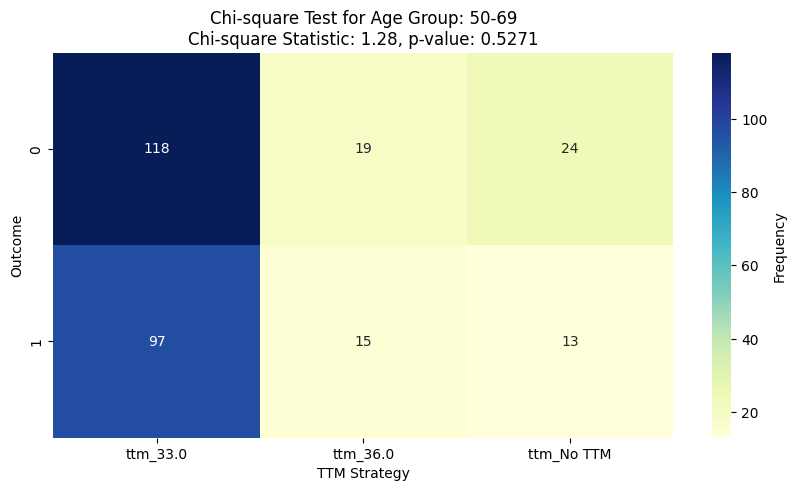

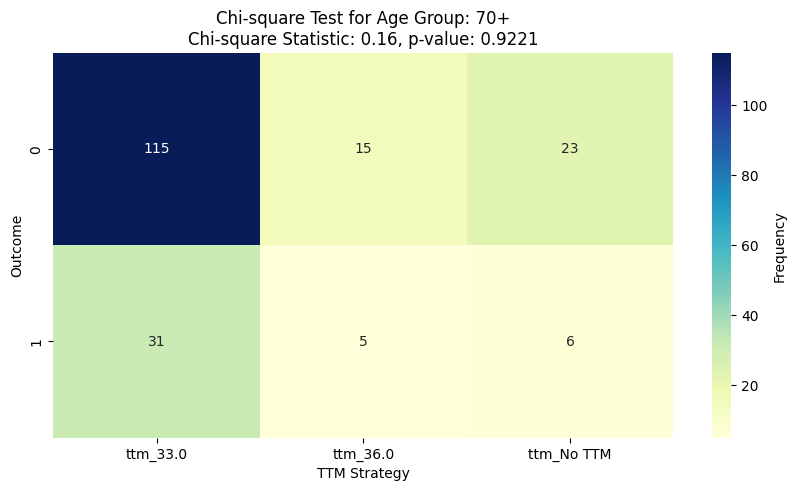

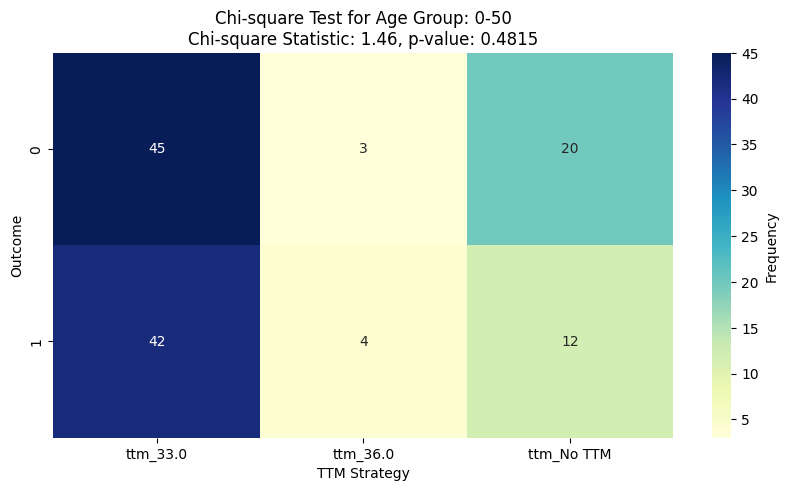

In [ ]:
def visualize_chi_square(dataframe):
    for age_group in dataframe['Age_Group'].unique():
        group_data = dataframe[dataframe['Age_Group'] == age_group]
        if not group_data.empty:
            crosstab = pd.crosstab(group_data['outcome'], group_data['TTM_Strategy'])
            if not crosstab.empty:
                chi2, p, dof, expected = chi2_contingency(crosstab)
                plt.figure(figsize=(10, 5))
                sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})
                plt.title(f'Chi-square Test for Age Group: {age_group}\nChi-square Statistic: {chi2:.2f}, p-value: {p:.4f}')
                plt.ylabel('Outcome')
                plt.xlabel('TTM Strategy')
                plt.show()

# Example usage with your DataFrame
visualize_chi_square(df)

## Chi-square Test Results for TTM Strategies by Age Groups

### Age Group: 0-50
- **Chi-square Statistic**: 1.46
- **p-value**: 0.4815
- **Interpretation**:
  - The p-value is well above 0.05, indicating no statistically significant association between TTM strategies and outcomes in this age group.
  - Suggests that TTM strategies (ttm_33.0, ttm_36.0, and No TTM) do not differentially impact outcomes among individuals younger than 50 years.

### Age Group: 50-69
- **Chi-square Statistic**: 1.28
- **p-value**: 0.5271
- **Interpretation**:
  - The p-value is above 0.05, showing no statistically significant association between TTM strategies and outcomes in this age group.
  - Indicates that for individuals aged between 50 and 69, the choice of TTM strategy does not significantly affect outcomes.

### Age Group: 70+
- **Chi-square Statistic**: 0.16
- **p-value**: 0.9221
- **Interpretation**:
  - The p-value is significantly above 0.05, revealing no statistically significant association in the oldest age group.
  - Points to no evidence that different TTM strategies impact outcomes among individuals aged 70 and above.

## General Observations
- Across all age groups, there is a consistent lack of statistical evidence to suggest that different TTM strategies influence patient outcomes significantly.
- This uniform absence of significant results may suggest that TTM strategies, as categorized, do not play a critical role in modifying outcomes, or other unmeasured factors may be influencing the results.

## Recommendations
- **Consider Additional Factors**: Future studies might need to include more variables that could potentially confound or mediate the relationship between TTM strategies and outcomes.
- **Reevaluate TTM Strategy Definitions**: There may be a need to look into more specific or diverse definitions of TTM strategies, considering aspects like timing, duration, and specific patient characteristics.
- **Focus on Clinical Significance**: Even in the absence of statistical significance, the clinical relevance of different TTM strategies should be evaluated based on patient health and recovery metrics.
